In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [64]:
info_csv = pd.read_csv('../datasets/labeled.csv')

In [65]:
info_csv.head()

,dport,having_ip_address,hostname_length,count_dir,count-www,fd_length,url_length,abnormal_url,count-http,count-letters,...,count-,count=,count-https,sus_url,count?,count%,short_url,count@,count_embed_domain,malicious
0,80,False,16,0,0,0,16,0,0,13,...,1,0,0,0,0,0,0,0,0,0
1,80,False,11,2,0,5,35,0,0,29,...,0,0,0,0,0,0,0,0,0,1
2,80,False,14,3,0,7,31,0,0,25,...,0,0,0,0,0,0,0,0,0,1
3,80,False,21,1,1,9,88,1,1,63,...,1,4,0,0,1,0,0,0,0,2
4,80,False,23,1,0,9,235,1,1,199,...,1,3,0,0,1,0,0,0,0,2


In [66]:
y = info_csv['malicious']
X = info_csv.drop('malicious', axis=1)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [68]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

<AxesSubplot: >

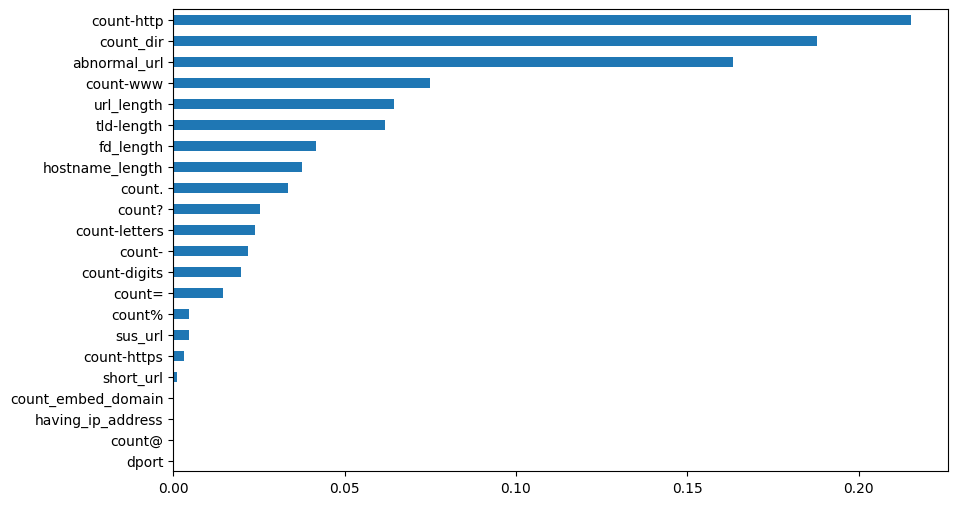

In [69]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [70]:
rfc_pred = rfc.predict(X_test)

In [71]:
print(confusion_matrix(y_test,rfc_pred))

[[ 262    1   40]
 [   0 4035    4]
 [   2   13  974]]


In [72]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       303
           1       1.00      1.00      1.00      4039
           2       0.96      0.98      0.97       989

    accuracy                           0.99      5331
   macro avg       0.98      0.95      0.96      5331
weighted avg       0.99      0.99      0.99      5331

